In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


train_data = pd.read_csv("dataset/train.csv")

# Make copies of dataset to preprocess data
train_data_preprocessed = train_data.copy()

In [2]:
# Preprocess data to populate NaN age value with value of the mean for the Pclass
# First iterate through rows, then if a row has a nan value in the age column assign a new value to it
for index, row in train_data.iterrows():
    if pd.isnull(row["Age"]):
        if row["Pclass"] == 1:
            train_data_preprocessed.loc[index, "Age"] = round(train_data_preprocessed[train_data_preprocessed["Pclass"]==1]["Age"].mean())
        elif row["Pclass"] == 2:
            train_data_preprocessed.loc[index, "Age"] = round(train_data_preprocessed[train_data_preprocessed["Pclass"]==2]["Age"].mean())
        else:
            train_data_preprocessed.loc[index, "Age"] = round(train_data_preprocessed[train_data_preprocessed["Pclass"]==3]["Age"].mean())

In [3]:
# Preprocess: Change male/female to boolean value
train_data_preprocessed["Sex"] = train_data_preprocessed["Sex"].map({"male":0, "female":1})

In [4]:
# Feature exploration

# Check if sex had a possible influence
women = train_data_preprocessed.loc[train_data_preprocessed.Sex == 1]["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)
men = train_data_preprocessed.loc[train_data_preprocessed.Sex == 0]["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)
print("\n-------------------------------------\n")

# Check if age had a possible influence
young = train_data_preprocessed.loc[train_data_preprocessed.Age <= 15]["Survived"]
rate_young = sum(young)/len(young)
print("% of young who survived:", rate_young)
old = train_data_preprocessed.loc[train_data_preprocessed.Age > 15]["Survived"]
rate_old = sum(old)/len(old)
print("% of old who survived:", rate_old)
print("\n-------------------------------------\n")

# Check if class had a possible influence
first = train_data_preprocessed.loc[train_data_preprocessed.Pclass == 1]["Survived"]
rate_first = sum(first)/len(first)
print("% of first class who survived:", rate_first)
second = train_data_preprocessed.loc[train_data_preprocessed.Pclass == 2]["Survived"]
rate_second = sum(second)/len(second)
print("% of second class who survived:", rate_second)
third = train_data_preprocessed.loc[train_data_preprocessed.Pclass == 3]["Survived"]
rate_third = sum(third)/len(third)
print("% of third class who survived:", rate_third)
print("\n-------------------------------------\n")

# Check if spouse or siblings count had a possible influence
sib_or_sp = train_data_preprocessed.loc[train_data_preprocessed.SibSp >= 1]["Survived"]
rate_sib_or_sp = sum(sib_or_sp)/len(sib_or_sp)
print("% of people with siblings or spouse who survived:", rate_sib_or_sp)
no_sib_or_sp = train_data_preprocessed.loc[train_data_preprocessed.SibSp == 0]["Survived"]
rate_no_sib_or_sp = sum(no_sib_or_sp)/len(no_sib_or_sp)
print("% of people without siblings or spouse who survived:", rate_no_sib_or_sp)
print("\n-------------------------------------\n")

# Check if parents or children count had a possible influence
par_or_ch = train_data_preprocessed.loc[train_data_preprocessed.Parch >= 1]["Survived"]
rate_par_or_ch = sum(par_or_ch)/len(par_or_ch)
print("% of people with parents or children who survived:", rate_par_or_ch)
no_par_or_ch = train_data_preprocessed.loc[train_data_preprocessed.Parch == 0]["Survived"]
rate_no_par_or_ch = sum(no_par_or_ch)/len(no_par_or_ch)
print("% of people without parents or children who survived:", rate_no_par_or_ch)



% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924

-------------------------------------

% of young who survived: 0.5903614457831325
% of old who survived: 0.3626237623762376

-------------------------------------

% of first class who survived: 0.6296296296296297
% of second class who survived: 0.47282608695652173
% of third class who survived: 0.24236252545824846

-------------------------------------

% of people with siblings or spouse who survived: 0.4664310954063604
% of people without siblings or spouse who survived: 0.34539473684210525

-------------------------------------

% of people with parents or children who survived: 0.5117370892018779
% of people without parents or children who survived: 0.34365781710914456


In [5]:
# Add some more preprocessing now that the features are selected
train_data_preprocessed.drop("PassengerId", inplace=True, axis=1)
train_data_preprocessed.drop("Name", inplace=True, axis=1)
train_data_preprocessed.drop("Ticket", inplace=True, axis=1)
train_data_preprocessed.drop("Fare", inplace=True, axis=1)
train_data_preprocessed.drop("Cabin", inplace=True, axis=1)
train_data_preprocessed.drop("Embarked", inplace=True, axis=1)

# Create new csv file with preprocessed data
train_data_preprocessed.to_csv("preprocessed/train_preprocessed.csv", index=False)

# Selected features and label
features = train_data_preprocessed.drop("Survived", axis=1)
label = train_data_preprocessed["Survived"]

In [6]:
# Create and train decision tree
dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth=6)
dt = dt.fit(features, label)
print("accuracy score (max-depth = 6):", dt.score(features, label))

# Second tree to test changing max depth and see results in test data later
dt2 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth=10)
dt2 = dt2.fit(features, label)
print("accuracy score (max-depth = 10):", dt2.score(features, label))

accuracy score (max-depth = 6): 0.8574635241301908
accuracy score (max-depth = 10): 0.9001122334455668


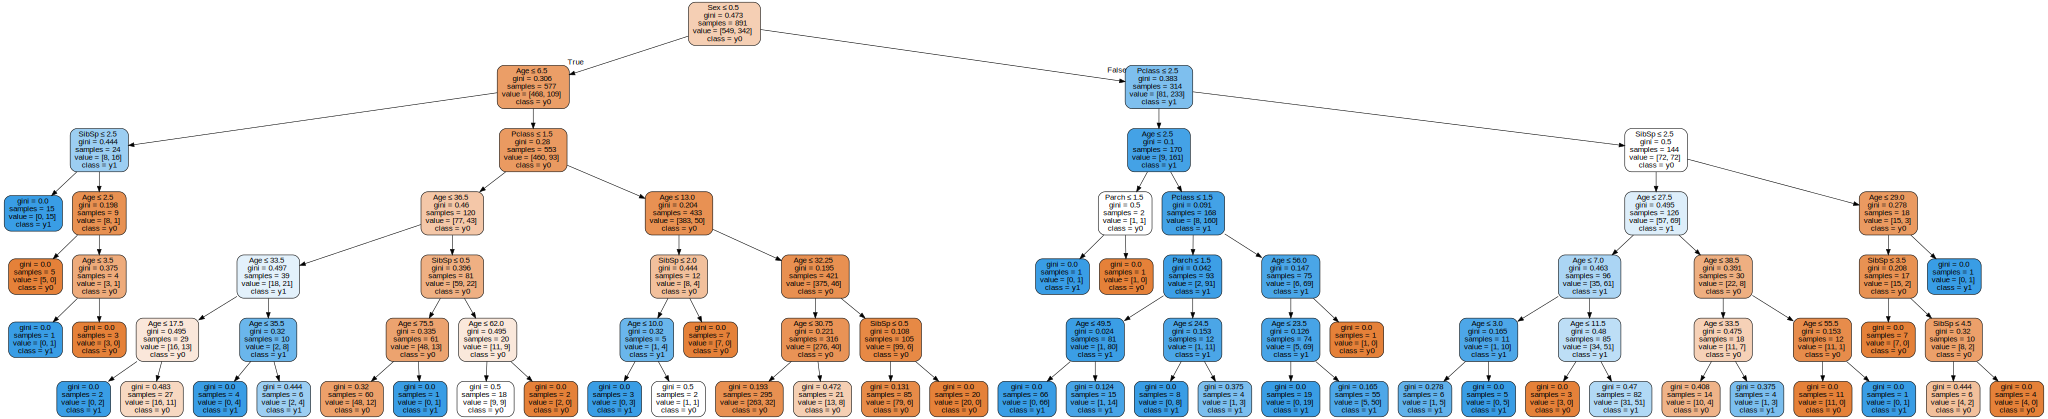

In [7]:
# Show decision tree
feature_names = list(features.columns)
tree_data = tree.export_graphviz(dt, out_file=None, feature_names=feature_names, class_names=True, filled=True, rounded=True, special_characters=True)  

graph = graphviz.Source(tree_data)  
graph

In [8]:
# Start the 5 fold cross validation process on the DT and calculate the mean of the accuracy
scores = cross_val_score(dt, X=features, y=label, cv=5)
scores2 = cross_val_score(dt2, X=features, y=label, cv=5)
print("5 fold CV DT accuracy scores (depth 6):", scores)
print("5 fold CV DT mean accuracy (depth 6):", np.mean(scores))
print("\n----------------------------\n")
print("5 fold CV DT accuracy scores (depth 10):", scores2)
print("5 fold CV DT mean accuracy (depth 10):", np.mean(scores2))

5 fold CV DT accuracy scores (depth 6): [0.80446927 0.81460674 0.84269663 0.79775281 0.82022472]
5 fold CV DT mean accuracy (depth 6): 0.8159500345238844

----------------------------

5 fold CV DT accuracy scores (depth 10): [0.79329609 0.81460674 0.81460674 0.78089888 0.83707865]
5 fold CV DT mean accuracy (depth 10): 0.808097420124286


In [9]:
# Create and train Random Forest
rf = RandomForestClassifier()
rf = RandomForestClassifier(n_estimators=100, criterion = "gini", max_depth=4)
rf.fit(features, label)
print("accuracy score Random Forest:", rf.score(features, label))

accuracy score Random Forest: 0.8361391694725028


In [10]:
# Start the 5 fold cross validation process on the DT and calculate the mean of the accuracy
rf_scores = cross_val_score(rf, X=features, y=label, cv=5)
print("5 fold CV Random Forest accuracy scores:", rf_scores)
print("5 fold CV Random Forest mean accuracy:", np.mean(rf_scores))


5 fold CV Random Forest accuracy scores: [0.82122905 0.82022472 0.82022472 0.80337079 0.85393258]
5 fold CV Random Forest mean accuracy: 0.8237963718536188
